In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)# to display all columns of the dataset

In [2]:
df=pd.read_csv(r"F:\studiess\Machine Learning and Artificial Intellignece\ML&AI_Coding_Academy\ML&AI_Repository\Python\Data_Analysis_Projects\Project2\UdemyCoursesDataset.csv")

# Understanding the Data

In [3]:
df.shape

(3682, 11)

In [4]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [5]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [6]:
df.tail()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [8]:
df.isna().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

**Insight:there are no null objects in the data**

In [9]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


**Insight: mean of subscribers is 3194, median is 911, max is 268923 maybe this is an outlier or a best seller**

In [10]:
df.describe(include="object")

,course_title,price,level,content_duration,published_timestamp,subject
count,3682,3682,3682,3682,3682,3682
unique,3667,38,4,109,3676,4
top,Acoustic Blues Guitar Lessons,20,All Levels,1 hour,2016-05-16T18:28:30Z,Web Development
freq,3,830,1932,607,2,1200


## Data Cleaning

In [11]:
#there is no null objects but there maybe duplicated data 
df.duplicated().sum()

np.int64(6)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
#some courses have 0 lectures, this is not logic so we will remove such courses
for x in df.index:
    if df.loc[x,"num_lectures"]==0:
        df.drop(x,inplace=True)
        
    

In [15]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.671000e+03,3671.000000,3671.000000,3671.000000
mean,6.759109e+05,3191.456007,156.414056,40.151185
std,3.431178e+05,9489.251824,936.302626,50.419616
min,8.324000e+03,0.000000,0.000000,4.000000
25%,4.077270e+05,112.000000,4.000000,15.000000
50%,6.877420e+05,912.000000,18.000000,25.000000
75%,9.608420e+05,2550.500000,67.000000,46.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [16]:
#course_id column is of no use
df.drop(columns="course_id",axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3671 entries, 0 to 3681
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_title         3671 non-null   object
 1   is_paid              3671 non-null   bool  
 2   price                3671 non-null   object
 3   num_subscribers      3671 non-null   int64 
 4   num_reviews          3671 non-null   int64 
 5   num_lectures         3671 non-null   int64 
 6   level                3671 non-null   object
 7   content_duration     3671 non-null   object
 8   published_timestamp  3671 non-null   object
 9   subject              3671 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 419.4+ KB


In [18]:
#adding a new column for years
#courses that was published in 2015
#converting date from object to date format
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year']=df["published_timestamp"].dt.year #adding a column for years


## EDA and Visualization:

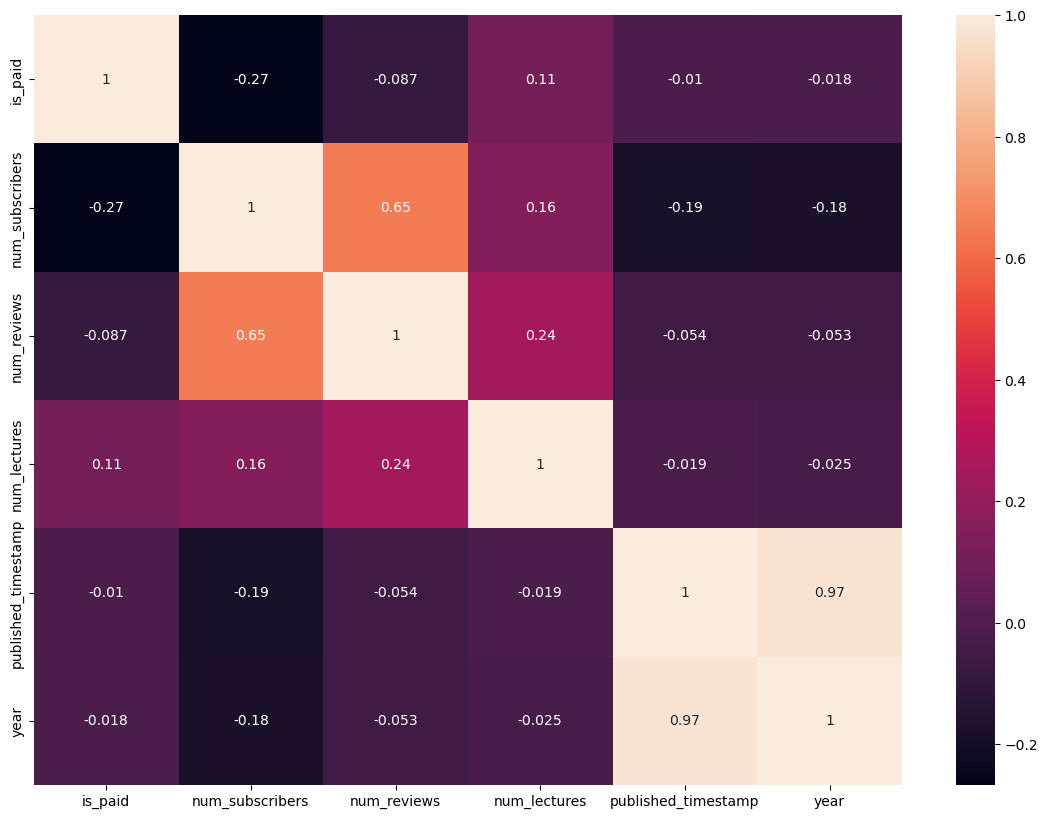

In [19]:
numerical_df=df.select_dtypes(exclude=np.object_)
plt.figure(figsize=(14,10))
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

## number of paid and free courses

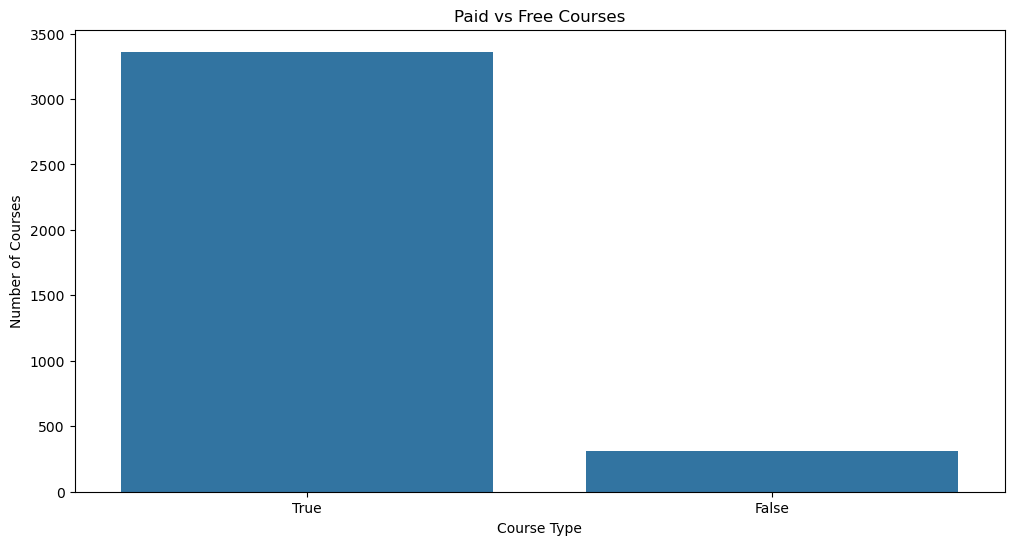

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="is_paid",order=df["is_paid"].value_counts().index)
plt.title("Paid vs Free Courses")
plt.xlabel("Course Type")
plt.ylabel("Number of Courses")
plt.show()

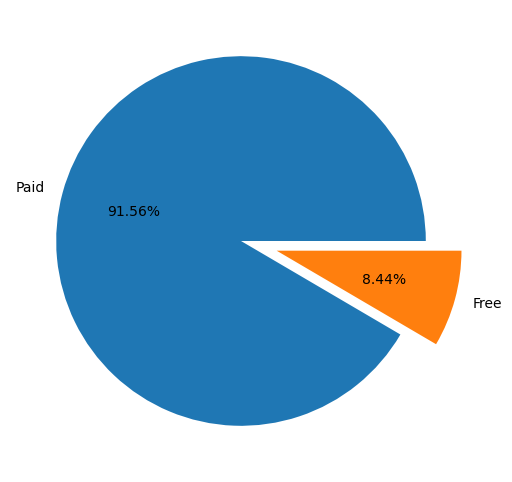

In [21]:
#ppie chart
plt.figure(figsize=(12,6))
plt.pie(df["is_paid"].value_counts().values,labels=["Paid","Free"],autopct="%1.2f%%",explode=[0,0.2])
plt.show()

## Number of courses in each Subject:

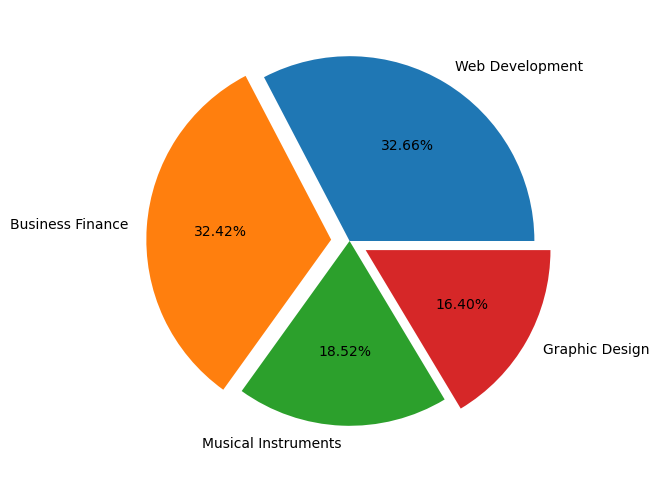

In [23]:
#objective: get a series that contains the subject as index and the number of occurence of each subject as the value
#Subjects,Subjects_counts=np.unique(df["subject"],return_counts=True)
#print(Subjects)
#print(Subjects_counts)
#Subjects_series=pd.Series(Subjects_counts,index=Subjects)
#print(Subjects_series)

Number_of_courses_series=df["subject"].value_counts()
plt.figure(figsize=(12,6))
plt.pie(Number_of_courses_series.values,labels=Number_of_courses_series.index,autopct="%1.2f%%",explode=[0,0.1,0,0.1])
plt.show()


## Course Published Over Years

In [33]:
df_by_years=df.groupby("year")

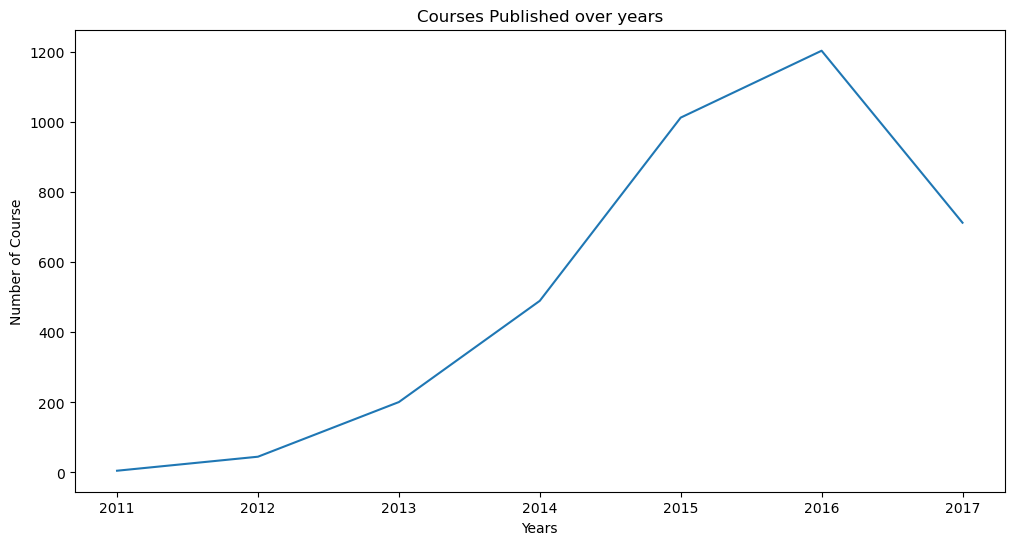

In [36]:
df_by_years.size()
years=df_by_years.size().index
number_of_courses=df_by_years.size().values
plt.figure(figsize=(12,6))
plt.plot(years,number_of_courses)
plt.title("Courses Published over years")
plt.xlabel("Years")
plt.ylabel("Number of Course")
plt.show()

## Free courses

In [24]:
#objective: get the free course
df_free=df[df["is_paid"]==False]
df_free

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
41,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23 05:08:14+00:00,Musical Instruments,2014
49,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21 18:50:50+00:00,Musical Instruments,2015
57,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13 21:51:59+00:00,Musical Instruments,2016
67,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10 20:19:10+00:00,Web Development,2014
74,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30 14:30:12+00:00,Business Finance,2017
...,...,...,...,...,...,...,...,...,...,...,...
3620,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15 00:21:56+00:00,Web Development,2015
3638,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18 17:01:40+00:00,Web Development,2017
3652,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03 17:45:31+00:00,Web Development,2016
3674,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments,2017


In [25]:
# paid courses
df_paid=df[df["is_paid"]==True]
df_paid


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017
...,...,...,...,...,...,...,...,...,...,...,...
3676,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance,2015
3677,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3678,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015
3679,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development,2015


## which courses (paid or free) has higher number of subscribers in each subject ?

[]

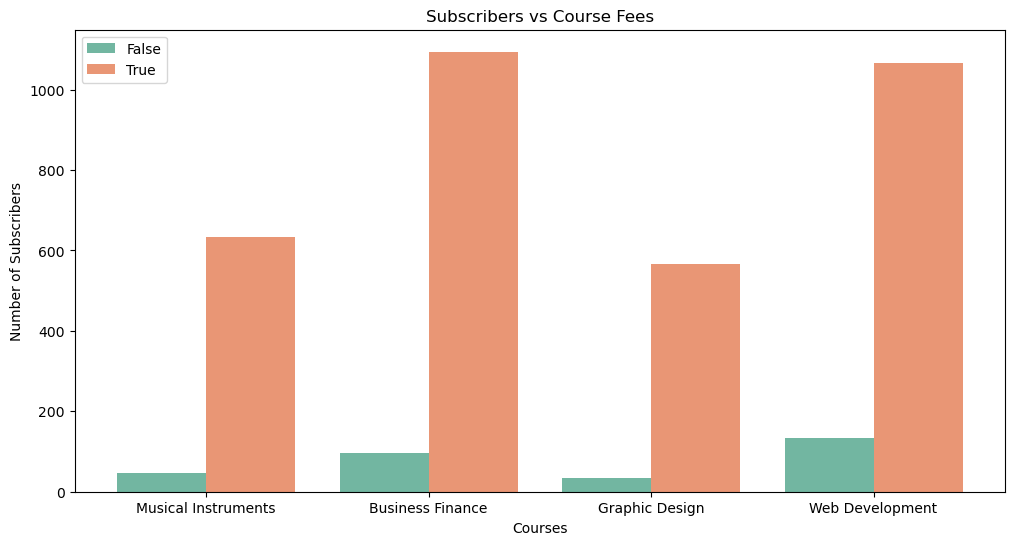

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="subject",hue="is_paid",palette="Set2")
plt.title("Subscribers vs Course Fees")
plt.xlabel("Courses")
plt.ylabel("Number of Subscribers")
plt.legend(loc="upper left")
plt.plot()

**as expected the subscribers per free courses are much more than subscribers for paid courses, but do they finish the course and end up with a certificate?**

## Number of subscribers vs Number of lectures

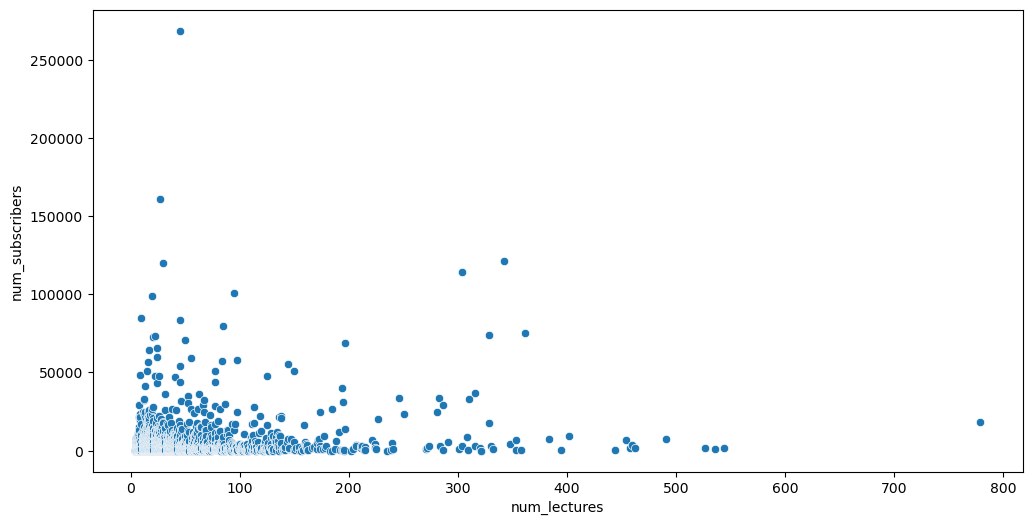

In [47]:
df.dtypes
df_lect=df.sort_values(by="num_lectures")
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_lect["num_lectures"],y=df_lect["num_subscribers"])
plt.show()

## Best Selling Courses:

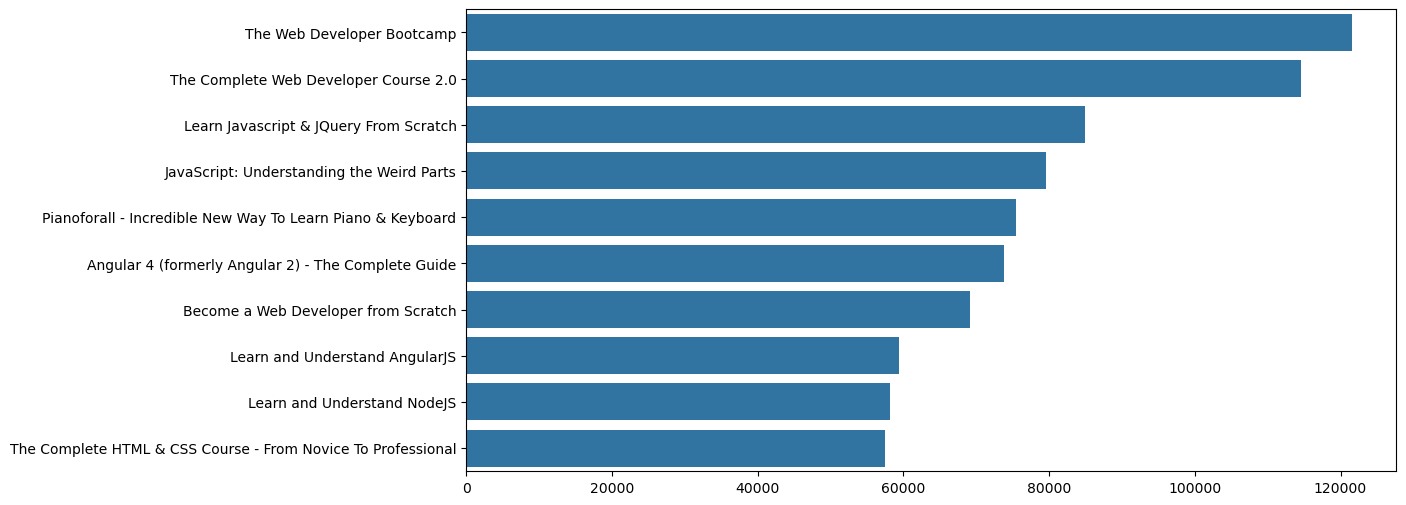

In [50]:
#sorting the Dataframe by best selling courses
Best_selling_courses=df_paid.sort_values(by="num_subscribers",ascending=False).head(10)["course_title"]
Number_of_subscribers=df_paid.sort_values(by="num_subscribers",ascending=False).head(10)["num_subscribers"]
plt.figure(figsize=(12,6))
sns.barplot(x=Number_of_subscribers.values,y=Best_selling_courses.values)
plt.show()


## Searching for courses with certain properties:

In [29]:
#courses about graphic design where the price is >=100:
#first we must make the column price data type as in to make the comparison
df["price"]=df["price"].replace({"Free":0})
df["price"]=df["price"].astype('int64')
graphic_courses_with_price_100=df[(df["subject"]=="Graphic Design") & (df["price"]>=100)]
graphic_courses_with_price_100

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
47,7 Secrets To Designing In Black and White,True,100,1000,1,12,All Levels,1.5 hours,2017-06-27 19:55:18+00:00,Graphic Design,2017
63,A Complete Guide to Successful Freelance Logo ...,True,145,2745,61,67,All Levels,8.5 hours,2015-02-19 03:39:50+00:00,Graphic Design,2015
87,会声会影深度教学,True,200,3,2,12,Beginner Level,36 mins,2017-03-17 17:07:38+00:00,Graphic Design,2017
157,Adobe Illustrator CC 2017 for beginners,True,195,2489,39,12,Beginner Level,1.5 hours,2017-01-31 22:13:11+00:00,Graphic Design,2017
166,Adobe Illustrator For Everyone: Create Detaile...,True,185,165,17,11,All Levels,1.5 hours,2016-08-09 14:07:47+00:00,Graphic Design,2016
...,...,...,...,...,...,...,...,...,...,...,...
3483,مدخل في أساسيات الفوطوشوب للمبتدئين فقط,True,120,13,9,7,Beginner Level,1 hour,2016-09-06 02:48:13+00:00,Graphic Design,2016
3499,Ultimate Guide on Freelancing Career in Photos...,True,165,1479,49,82,All Levels,6.5 hours,2015-04-30 19:41:43+00:00,Graphic Design,2015
3505,Ultimate Photoshop Training: From Beginner to Pro,True,200,5326,447,150,Beginner Level,11.5 hours,2017-01-12 16:56:22+00:00,Graphic Design,2017
3533,Vector Logo Design in Affinity Designer,True,150,1789,102,57,All Levels,3 hours,2017-02-07 18:09:03+00:00,Graphic Design,2017


In [30]:
#courses that contains python in their title
python_course=df[df["course_title"].str.contains('Python')]
python_course

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
216,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11 22:09:24+00:00,Web Development,2016
777,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08 00:46:14+00:00,Web Development,2013
814,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08 20:57:35+00:00,Web Development,2015
842,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29 00:58:43+00:00,Web Development,2014
1400,Fun and creative web engineering with Python a...,False,0,10917,319,25,All Levels,2 hours,2015-06-09 19:51:50+00:00,Web Development,2015
1932,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22 00:11:22+00:00,Web Development,2016
1969,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13 21:40:32+00:00,Business Finance,2016
2294,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09 15:37:56+00:00,Web Development,2015
2295,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18 21:53:34+00:00,Web Development,2017
2341,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08 00:15:12+00:00,Graphic Design,2015


## Max Number of Subscribers in Each Level

In [31]:
max_number_of_subscribers_per_level=df.groupby("level").max()["num_subscribers"]
max_number_of_subscribers_per_level

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

In [32]:
#max in each level for all the data features
max_per_level=df.groupby("level").max()
max_per_level

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,subject,year
level,,,,,,,,,,
All Levels,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,True,200,268923,27445,544,9.5 hours,2017-07-06 21:16:13+00:00,Web Development,2017
Beginner Level,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,True,200,161029,5924,779,9.5 hours,2017-07-06 21:46:30+00:00,Web Development,2017
Expert Level,[Value Investing] Where White People Keep Thei...,True,200,5172,249,157,9 hours,2017-07-04 18:08:01+00:00,Web Development,2017
Intermediate Level,株式投資で本当のテクニカル分析ができるようになる,True,200,29167,3326,320,9.5 hours,2017-07-05 04:41:54+00:00,Web Development,2017
